# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("data/lfw/*/*"))
dog_files = np.array(glob("data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


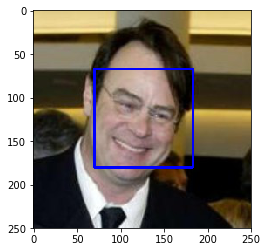

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.imread(human_files[0], 0)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    gray = cv2.imread(img_path, 0)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

nbrFaces_HumanFiles = 0
nbrFaces_DogFiles = 0
nbr_files = len(human_files_short)

for index in tqdm(range(nbr_files)):
    
    if face_detector(human_files_short[index]):
        nbrFaces_HumanFiles += 1
        
    if face_detector(dog_files_short[index]):
        nbrFaces_DogFiles += 1
    
print('Percent of detected faces in the 1st 100 human images: {}%'.format(nbrFaces_HumanFiles))
print('Percent of detected faces in the 1st 100 dog images: {}%'.format(nbrFaces_DogFiles))


100%|██████████| 100/100 [01:31<00:00,  2.92it/s]

Percent of detected faces in the 1st 100 human images: 98%
Percent of detected faces in the 1st 100 dog images: 17%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    image = Image.open(img_path).convert('RGB')
        
    max_size = 250
    size = max(image.size)
    
    if size > max_size:
        size = max_size
        
    
    in_transforms = transforms.Compose([transforms.Resize((size, size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                            std=[0.229, 0.224, 0.225])
                                       ])
    
    # Discard alpha channel and add the batch dimension
    image = in_transforms(image)[:3,:,:].unsqueeze(0)
    
    return VGG16(image).argmax(dim=1).item() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    predictedClass = VGG16_predict(img_path)
    
    return predictedClass >= 151 and predictedClass <= 268 # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

nbrDogs_HumanFiles = 0
nbrDogs_DogFiles = 0
nbr_files = len(human_files_short)

for index in tqdm(range(nbr_files)):
    
    if dog_detector(human_files_short[index]):
        nbrDogs_HumanFiles += 1
        
    if dog_detector(dog_files_short[index]):
        nbrDogs_DogFiles += 1
    
print('Percent of detected dogs in human_files_short: {}%'.format(nbrDogs_HumanFiles))
print('Percent of detected dogs in dog_files_short: {}%'.format(nbrDogs_DogFiles))

100%|██████████| 100/100 [03:49<00:00,  2.26s/it]

Percent of detected dogs in human_files_short: 0%
Percent of detected dogs in dog_files_short: 100%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

from PIL import Image
import torchvision.transforms as transforms

inceptionV3 = models.inception_v3(pretrained=True)

if use_cuda:
    inceptionV3 = inceptionV3.cuda()
    

def Inception3_predict(img_path):
    
    image = Image.open(img_path).convert('RGB')
        
    max_size = 299
    size = max(image.size)
    
    if size > max_size:
        size = max_size
    
    in_transforms = transforms.Compose([transforms.Resize((max_size, max_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                            std=[0.229, 0.224, 0.225])])
    
    # Discard alpha channel and add the batch dimension
    image = in_transforms(image)[:3,:,:].unsqueeze(0)
    
    return inceptionV3(image).argmax(dim=1).item()



def dog_detector(img_path):
    ## TODO: Complete the function.
    
    predictedClass = Inception3_predict(img_path)
    
    return predictedClass >= 151 and predictedClass <= 268 # true/false


nbrDogs_HumanFiles = 0
nbrDogs_DogFiles = 0
nbr_files = len(human_files_short)

inceptionV3.eval()

for index in tqdm(range(nbr_files)):
    
    if dog_detector(human_files_short[index]):
        nbrDogs_HumanFiles += 1
        
    if dog_detector(dog_files_short[index]):
        nbrDogs_DogFiles += 1
    
print('Percent of detected dogs in human_files_short: {}%'.format(nbrDogs_HumanFiles))
print('Percent of detected dogs in dog_files_short: {}%'.format(nbrDogs_DogFiles))

100%|██████████| 100/100 [01:32<00:00,  1.10it/s]

Percent of detected dogs in human_files_short: 1%
Percent of detected dogs in dog_files_short: 100%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [10]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

import torch
from torchvision import transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


# Define paths
dataDir = 'data/dog_images/'
trainDir = os.path.join(dataDir, 'train/')
validDir = os.path.join(dataDir, 'valid/')
testDir = os.path.join(dataDir, 'test/')


# Define transformations
size = 240

normalizeTransformation = transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                               std=[0.229, 0.224, 0.225])

transform_TrainData = transforms.Compose([transforms.Resize((size, size)),
                                          transforms.RandomRotation(30),
                                          transforms.RandomHorizontalFlip(),
                                          transforms.ToTensor(),
                                          normalizeTransformation])

transform_ValidTestData = transforms.Compose([transforms.Resize((size, size)),
                                         transforms.ToTensor(),
                                         normalizeTransformation])


# Define datasets 
trainData = datasets.ImageFolder(trainDir, transform=transform_TrainData)
validData = datasets.ImageFolder(validDir, transform=transform_ValidTestData)
testData = datasets.ImageFolder(testDir, transform=transform_ValidTestData)

# Define DataLoaders
batch = 16
numWorkers = 0

trainDataLoader = torch.utils.data.DataLoader(trainData, batch_size=batch, shuffle=True, num_workers=numWorkers)
validDataLoader = torch.utils.data.DataLoader(validData, batch_size=batch, shuffle=True, num_workers=numWorkers)
testDataLoader = torch.utils.data.DataLoader(testData, batch_size=batch, shuffle=True, num_workers=numWorkers)


loaders = {'train':trainDataLoader, 'valid':validDataLoader, 'test':testDataLoader}


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 

1) The code scales the images.

2) The input tensor has a size of 240. I observed that almost all the CNN models from the torchvision package have an input tensor of size 224 whith the exception of the inception model which input tensor have a size of 299. So, I decided to choose a number between these two values.

3) Yes, I decided to do it beacause the dataset is not so big. 

4) The data augmentation is done through random rotations and random horizontal flips.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [15]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
    
        numDogBreeds = 133
        
        # Convolutional layers
        # Sees 240x240x3 image tensor 
        self.conv1 = nn.Conv2d(3, 16, 5, padding = 2)
        # Sees 120x120x16 image tensor 
        self.conv2 = nn.Conv2d(16, 32, 5, padding = 2)
        # Sees 60x60x32 image tensor
        self.conv3 = nn.Conv2d(32, 64, 5, padding = 2)
        # Sees 30x30x64 image tensor
        self.conv4 = nn.Conv2d(64, 128, 5, padding = 2)
        # Sees 15x15x128 image tensor
        self.conv5 = nn.Conv2d(128, 256, 5, padding = 2)

        # Max-Pooling layers
        self.maxPool2 = nn.MaxPool2d(2, 2)
        self.maxPool3 = nn.MaxPool2d(3, 3)
        
        # Linear layers
        self.fc1 = nn.Linear(256*5*5, 800)
        self.fc2 = nn.Linear(800, numDogBreeds)
        
        # Batch Normalization layers
        self.bN_1 = nn.BatchNorm2d(16)
        self.bN_2 = nn.BatchNorm2d(32)
        self.bN_3 = nn.BatchNorm2d(64)
        self.bN_4 = nn.BatchNorm2d(128)
        self.bN_5 = nn.BatchNorm2d(256)
         
        # Dropout layer
        self.drop = nn.Dropout(p=0.20)  


    
    def forward(self, x):
        ## Define forward behavior
        
        x = self.conv1(x)
        x = self.maxPool2(x)
        x = F.relu(self.bN_1(x))
        
        x = self.conv2(x)
        x = self.maxPool2(x)
        x = F.relu(self.bN_2(x))
        
        x = self.conv3(x)
        x = self.maxPool2(x)
        x = F.relu(self.bN_3(x))
        
        x = self.conv4(x)
        x = self.maxPool2(x)
        x = F.relu(self.bN_4(x))
        
        x = self.conv5(x)
        x = self.maxPool3(x)
        x = F.relu(self.bN_5(x))
        
        x = x.view(-1, 256*5*5)
        
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = self.fc2(x)        
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

1) I started by doing a little research about the architecture of the CNN models of the torchvision package. Then, I used the VGG16 model as inspiration because its architecture is not so complex. 

First, I tried a CNN model with 5 convolutional blocks followed a classifier block. 

Each convolutional block was composed of 2 convolutional layers, 2 ReLU layers and a max-pooling layer. In the 1st convolutional block, the 1st convolutional layer had 3 input channels and 48 output channels, on the rest of the convolutional blocks, this layer doubles the number input channels. In the second convolutional layer of each convolutional block, the number of output channels was equal to the number of inputs channels. Regarding the max-pooling layers, in the first 4 blocks, these layers down-sampled the input channels by a factor of 2 and in the last one by a factor of 3.

The classifier block was composed of two fully connected layers, and a dropout layer. The fully connected layers had 1200 nodes and 133 nodes respectively. The probability of the dropout layer was of 25%.

2) The execution of this CNN model was taking so long. Because of this, I decided to add a batch normalization layer before each ReLU layer to speed up the training. 

3) When I was executing this new architecture, I didn’t notice a big difference on the training. So, I decided to delete the second convolutional layer from all the convolutional blocks and I also reduced the size of the output channels of the first convolutional layer to 32.

4) With this modification, the training time took much less time than with the previous model and I got 13 % of test accuracy. After this result, I decided to reduce the overfitting and decrease the training time of the CNN model. To achieve the first goal, I reduced to 16 the size of the output channels of the first convolutional and I set the probability of the dropout layer to 20 percent. In the case of the second goal, I inverted the order of the max-pooling layer and the activation layer, this produces the same result, since the ReLU function and its derived are monotonic, but its computational cost is inferior.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [17]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [18]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer.zero_grad()
            prediction = model(data)
            loss = criterion(prediction, target)
            loss.backward()
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            prediction = model(data)
            loss = criterion(prediction, target)
            
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased

        if valid_loss < valid_loss_min:
            print('Saving model')
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
            
    # return trained model
    return model


# train the model
model_scratch = train(30, loaders, model, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.789124 	Validation Loss: 4.550150
Saving model
Epoch: 2 	Training Loss: 4.481887 	Validation Loss: 4.325289
Saving model
Epoch: 3 	Training Loss: 4.345612 	Validation Loss: 4.206361
Saving model
Epoch: 4 	Training Loss: 4.246883 	Validation Loss: 4.099857
Saving model
Epoch: 5 	Training Loss: 4.141004 	Validation Loss: 4.050214
Saving model
Epoch: 6 	Training Loss: 4.086630 	Validation Loss: 3.950135
Saving model
Epoch: 7 	Training Loss: 4.002225 	Validation Loss: 3.899803
Saving model
Epoch: 8 	Training Loss: 3.926500 	Validation Loss: 3.830820
Saving model
Epoch: 9 	Training Loss: 3.856441 	Validation Loss: 3.769789
Saving model
Epoch: 10 	Training Loss: 3.770639 	Validation Loss: 3.656064
Saving model
Epoch: 11 	Training Loss: 3.692921 	Validation Loss: 3.590048
Saving model
Epoch: 12 	Training Loss: 3.625782 	Validation Loss: 3.511143
Saving model
Epoch: 13 	Training Loss: 3.532072 	Validation Loss: 3.474517
Saving model
Epoch: 14 	Training Loss: 3.499782

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [19]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.568671


Test Accuracy: 33% (279/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [11]:
## TODO: Specify data loaders
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

import torch
from torchvision import transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True



imageSize = 224
dataSetsDir = 'data/dog_images/'


pathDatasets = {'train': os.path.join(dataSetsDir, 'train/'),
                'valid': os.path.join(dataSetsDir, 'valid/'),
                'test': os.path.join(dataSetsDir, 'test/')}


normalizeTransform = transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                          std=[0.229, 0.224, 0.225])


transformsTrainDS = transforms.Compose([transforms.Resize((imageSize, imageSize)),
                                          transforms.RandomRotation(30),
                                          transforms.RandomHorizontalFlip(),
                                          transforms.ToTensor(),
                                          normalizeTransform])


transformsValidTestDS = transforms.Compose([transforms.Resize((imageSize, imageSize)),
                                                 transforms.ToTensor(),
                                                 normalizeTransform])


dataSetsTransforms = {'train': transformsTrainDS,
                      'valid': transformsValidTestDS,
                      'test': transformsValidTestDS}


data_transfer = {'train': datasets.ImageFolder(pathDatasets['train'], transform = dataSetsTransforms['train']),
                 'valid': datasets.ImageFolder(pathDatasets['valid'], transform = dataSetsTransforms['valid']),
                 'test': datasets.ImageFolder(pathDatasets['test'], transform = dataSetsTransforms['test'])}



# Define DataLoaders
batch = 16
numWorkers = 0

loaders_transfer = {'train': torch.utils.data.DataLoader(data_transfer['train'], batch_size=batch, shuffle=True, num_workers=numWorkers),
                    'valid': torch.utils.data.DataLoader(data_transfer['valid'], batch_size=batch, shuffle=True, num_workers=numWorkers),
                    'test': torch.utils.data.DataLoader(data_transfer['test'], batch_size=batch, shuffle=True, num_workers=numWorkers)}


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [12]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
    
model_transfer = models.resnet34(pretrained=True)
# print(model_transfer)

nbrClassesDogBreed = 133
numberInputFeatures = model_transfer.fc.in_features

# Freeze training for all the features layers
for param in model_transfer.parameters():
    param.requires_grad = False

model_transfer.fc = nn.Linear(numberInputFeatures, nbrClassesDogBreed)    


# Initialize weights of the last fcl
y = 1.0/np.sqrt(numberInputFeatures)
model_transfer.fc.weight.data.normal_(0.0, y)
model_transfer.fc.bias.data.fill_(0.0)


if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

1)	First, I decided to use the pretrained ResNet-34 model, because its top-1 and top-5 error are smaller compared to the errors of most of the models of the torchvision.models package.

2)	Since the target data set is small and the model is already trained, I needed to change the last fully connected layer to matches the number dog breeds to classify. 

3)	Regarding the weight initialization of this architecture, I froze all the learning parameters with exception of the new fully connected layer, for this layer I used a normal distribution of mean 0 and a standard deviation of 1/sqrt(n). These modifications allow to train only the new fully connected layer in a few epochs.

I think this architecture can be a suitable dog breed classifier because it was built from a pretrained CNN model, the ResNet-34, model who has a good accuracy. Due to fact that dog data set is smaller, and it should not be so different from the one used to train the model, I only needed to replace and retrain the last fully connected layer with another one that matches the number of dog breeds. If the dog data set were large and different, I will need to use fine-tuning or maybe retrain the whole CNN architecture.



### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [22]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [23]:
n_epochs = 5

# train the model
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.828998 	Validation Loss: 1.425413
Saving model
Epoch: 2 	Training Loss: 1.236177 	Validation Loss: 1.039817
Saving model
Epoch: 3 	Training Loss: 0.945747 	Validation Loss: 0.862180
Saving model
Epoch: 4 	Training Loss: 0.805460 	Validation Loss: 0.782990
Saving model
Epoch: 5 	Training Loss: 0.747853 	Validation Loss: 0.791342


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [24]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.824008


Test Accuracy: 74% (624/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [13]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    image = Image.open(img_path).convert('RGB')
        
    max_size = 224
    size = max(image.size)
    
    if size > max_size:
        size = max_size
        
    
    in_transforms = transforms.Compose([transforms.Resize((size, size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                            std=[0.229, 0.224, 0.225])
                                       ])
    
    # Discard alpha channel and add the batch dimension
    image = in_transforms(image)[:3,:,:].unsqueeze(0)
    
    
    values, indexClassDogBreed = torch.sort(model_transfer(image), dim=1, descending=True)
    indexClassDogBreed = np.squeeze(indexClassDogBreed.numpy())

    #TopDogBreeds = 5
    #for indexTopBreed in range(TopDogBreeds):
    #    print('{}: {}%'.format(class_names[indexClassDogBreed[indexTop10]], values[0][indexTop10]))
    
    return class_names[indexClassDogBreed[0]]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [14]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
        
    message = ''
    bDogHuman = False
          
    if dog_detector(img_path):
        print('Dog detected')
        message = 'Dog breed: '
        bDogHuman = True
             
    elif face_detector(img_path):
        print('Human detected')
        message = 'looks like a ... '
        bDogHuman = True
        
    else:
        print('No human or dog were detected')
        
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
    if not bDogHuman:
        return
    
    dogBreed = predict_breed_transfer(img_path)
    print(message + dogBreed)


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

I think the algorithm does a good job, It detected correctly if the image contained a dog, a humain or neither. But as expected, It missclassified some dog breeds, specially when these breeds look similar.

In order to improve the algorithm we could consider:

1) Clean the data set, there are some images containing more than one dog or a combination of persons and dogs

2) Get more dog images and use data augmentation to train the model for longer

3) Traing a CNN model to detect human faces. In the run_app function, I used to execute the face_detector before the dog_detector and sometimes dogs images were classified like human images; then, I switched them and I got a better result


No human or dog were detected


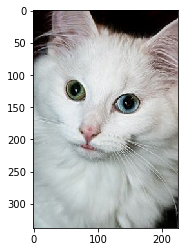




Dog detected


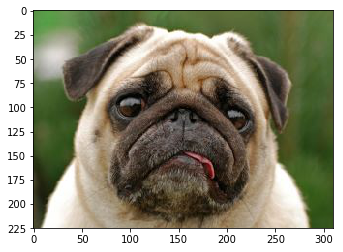

Dog breed: Chinese shar-pei



Human detected


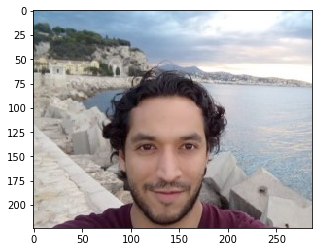

looks like a ... Norwegian buhund



Dog detected


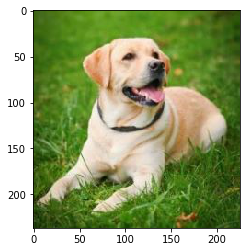

Dog breed: Labrador retriever



Human detected


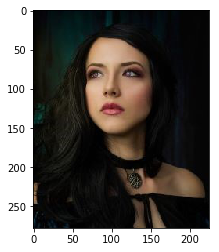

looks like a ... Boykin spaniel





In [20]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

model_transfer = model_transfer.cpu()
model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location=lambda storage, loc: storage))
model_transfer.eval()

inceptionV3 = inceptionV3.cpu()

# load filenames
images = np.array(glob("MyImages/*"))

## suggested code, below
#for file in np.hstack((human_files[:3], dog_files[:3])):
for imageName in images:
    run_app(imageName)
    print('\n\n')